<a href="https://colab.research.google.com/github/GabeMaldonado/UoL_Study_Materials/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# You will need to install the `matplotlib` python package
import matplotlib.pyplot as plt
from   matplotlib        import rc
import pandas            as pd
from   mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

plt.style.use("ggplot") # This defines an aesthetic style

In [2]:
# This is a common dataset about Iris flowers
remote_data = "https://dr3vr6j2erh62.cloudfront.net/mediastore/dsm020/datasets/IRIS.csv"
df  = pd.read_csv(remote_data, header=0, index_col=None)
odf = df.copy()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,7.2,3.0,5.8,1.6,virginica
96,7.4,2.8,6.1,1.9,virginica
97,7.9,3.8,6.4,2.0,virginica
98,6.4,2.8,5.6,2.2,virginica


In [3]:
# Add a column to the dataframe about that is an integer-represented version of the 
# `species column. For example where species == 'setosa', the new column should be 0
# and where species == 'virginica' the new colum should would be 1
df['spec_cat'] = df['species'].map({'setosa':0, 'virginica':1, 'versicolor':2})



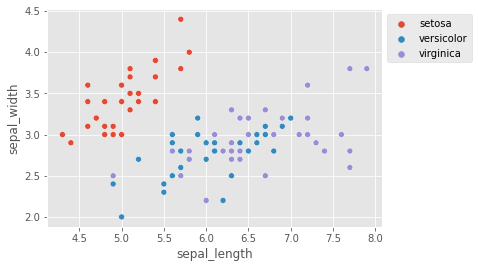

In [4]:
# Create a scatter plot with Sepal Length, Sepal Width on the spatial dimensions
#  and colored points for the species.
# You may want to create a integer-type column for species

# If you use the integer species column (which has values 0 - 2) you can index this
# array of color names:
#mycolors = ['red','blue','green']

sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')
plt.legend(bbox_to_anchor=(1, 1), loc=2);


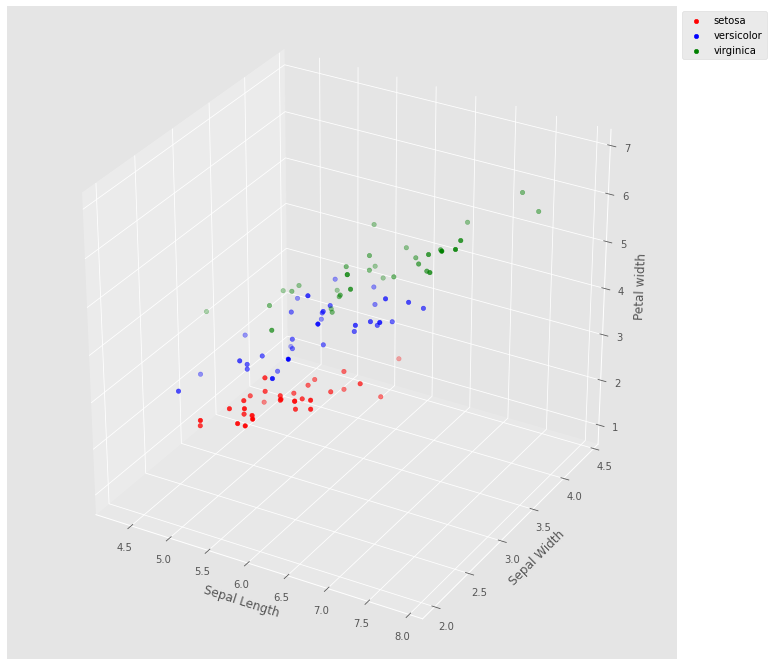

In [5]:
# But there are a lot more than two dimensions (+ species) in the data
# Let's try a 3D plot with matplotlib.
# See https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# Create a 3D scatter plot of the sepal width , sepal length and petal length
# You can pass a color vector like you (hopefully) did with 2D scatter()
mycolors = ['red','blue','green']
species = sorted(list(set(df['species'])))
f = plt.figure(figsize=(12,12))
ax = f.add_subplot(111, projection='3d')

for i, specie in enumerate(species):
  df2 = df.loc[df['species']==specie]
  ax.scatter(df2['sepal_length'], df2['sepal_width'], df2['petal_length'],
             c=mycolors[i], label=specie)
  
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
ax.set_zlabel('Petal width')
ax.legend()
plt.legend(bbox_to_anchor=(1, 1), loc=2);

  
 


# You also may want to render the same plot from different angles.

In [6]:
print(species)

['setosa', 'versicolor', 'virginica']


In [7]:
df.drop(columns='spec_cat', inplace=True)


In [8]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


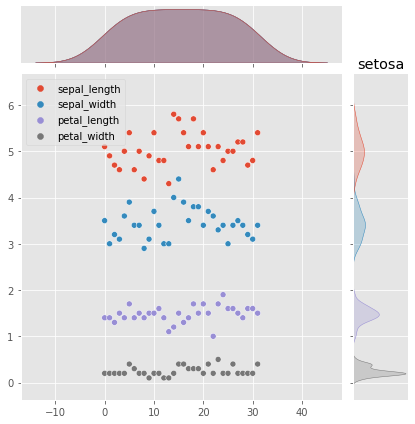

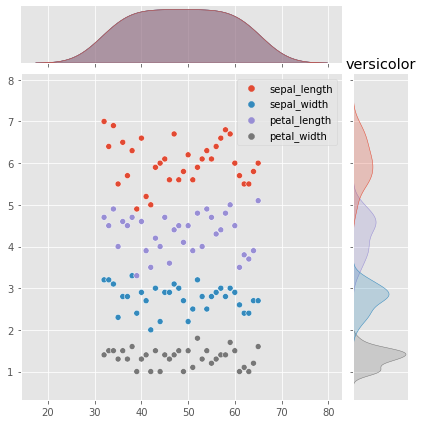

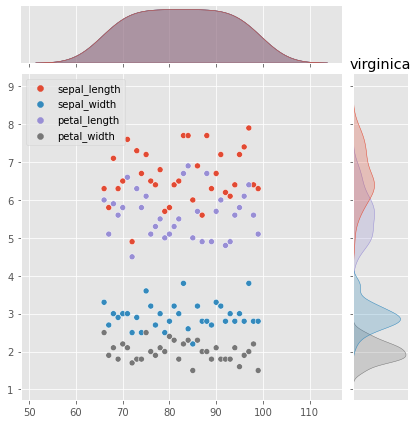

In [9]:
# Use the Seaborn package (https://seaborn.pydata.org/) `pip install seaborn`
#  to visualize joint distributions between sepal and petal properties
# Specifically, use the jointplot() function to visualize petal properties
# Note that this function may take a few seconds to run.
import seaborn as sns

for i in species:
  df2 = df[df['species']==i]
  sns.jointplot(data=df2, kind="scatter")
  plt.title(i)
plt.show()
           
      


# Question: adding the argument kind='reg' adds information to the plot. 
#           looking at the documentation, what is this information?

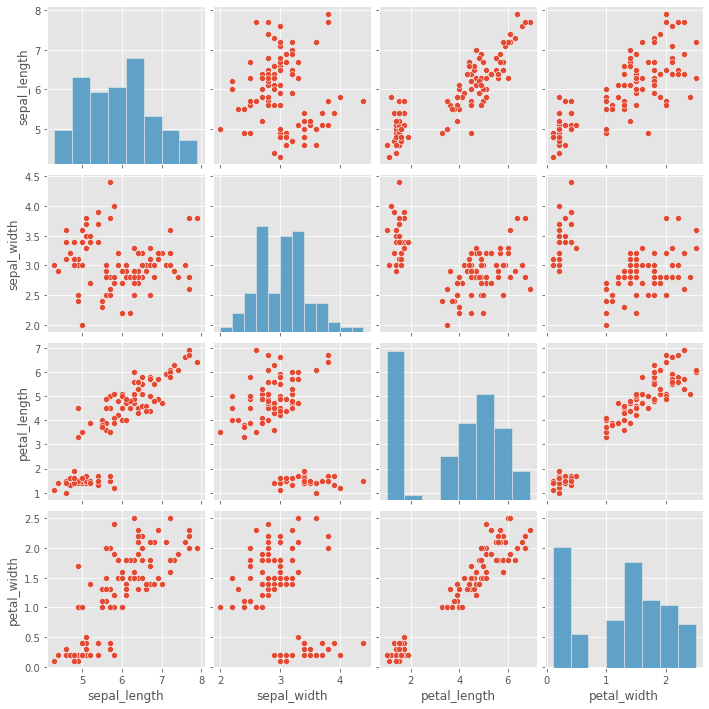

In [10]:
# Use seaborn's pairplot() function to plot All The Dimensions at once.
# You may want to use the original dataframe (without the integer species column)
# without the added columns
sns.pairplot(df)


# Try adding kind='reg',diag_kind='kde' to pairplot()
# Which representation do you like better? why?

# Create visualizations for the Pima-Indians Dataset

In [11]:
# path for df
data_url = "https://dr3vr6j2erh62.cloudfront.net/mediastore/dsm020/datasets/pima_indians-diabetes_data-raw.csv"

In [13]:
df_pima = pd.read_csv(data_url)
df_pima.head(2)

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,2-hour_serum_insulin,BMI,diabetes_pedigreen,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False


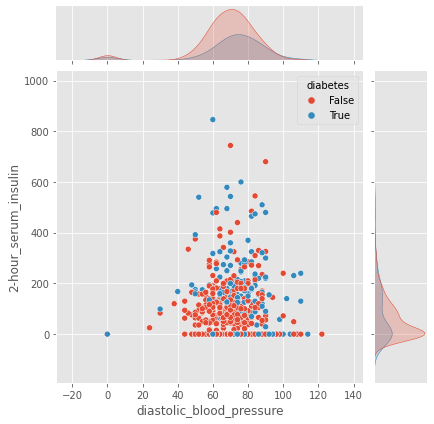

In [16]:
# joint plot
sns.jointplot(data = df_pima, x="diastolic_blood_pressure", y="2-hour_serum_insulin", hue = "diabetes")

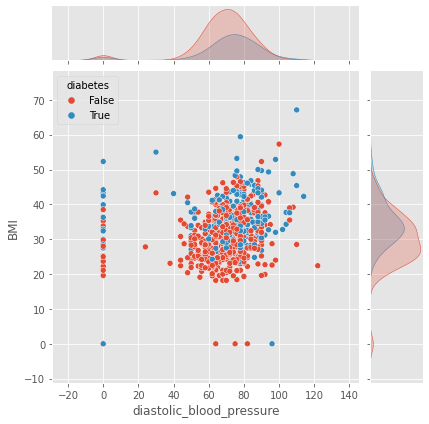

In [18]:
sns.jointplot(data = df_pima, x="diastolic_blood_pressure", y="BMI", hue = "diabetes")

In [26]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

colormap = {0: 'red', 1:'blue'}
colors = [colormap[x] for x in df_pima['diabetes']]

diabetes = {0: 'Non-diabetes', 1:'Diabetes'}
df_pima['Diabetes'] = [diabetes[x] for x in df_pima['diabetes']]

TOOLTIPS = [
            ("Index", "$index"),
            ("Plasma Glucose Concentration", "@x"),
            ("2 hour Serum Insulin", "@y")
]

select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'reset']
p = figure(title = "Pima Indian-Diabetes", tools='box_select, lasso_select, poly_select, tap, hover, pan, wheel_zoom, box_zoom, reset',
           tooltips=TOOLTIPS)

p.xaxis.axis_label = 'Plasma Glucose Concentration'
p.yaxis.axis_label = '2 hour Serum Insulin'

for d in diabetes.keys():
  data = df_pima[df_pima['diabetes'] == d]
  p.circle(data["plasma_glucose_concentration"], data["2-hour_serum_insulin"],
           color=colormap[d], fill_alpha=0.2, size=10, legend_label = diabetes[d])
  
show(p)

